In [4]:
# Import packages
import pandas as pd
import numpy as np

# 0 Exploratory Analysis

In [5]:
# Path to folder containing data file
path = "C:/Users/farou/Jupyter projects/ML/GP/KKBOX-Churn/"

# Import raw data
kkbox_df = pd.read_csv(path + "kkbox_df_clean.csv")

## 0.1 Summary Statistics

In [6]:
kkbox_df.columns

Index(['Unnamed: 0', 'is_churn', 'bd', 'registration_init_time',
       'count_userlogs_last_month', 'num_25_last_month', 'num_50_last_month',
       'num_75_last_month', 'num_985_last_month', 'num_100_last_month',
       'num_unq_last_month', 'total_secs_last_month', 'num_25_last_week',
       'num_50_last_week', 'num_75_last_week', 'num_985_last_week',
       'num_100_last_week', 'num_unq_last_week', 'total_secs_last_week',
       'avg_payment_plan_days', 'avg_plan_list_price',
       'avg_actual_amount_paid', 'last_is_auto_renew', 'memberdays_left',
       'city_1', 'city_3', 'city_4', 'city_5', 'city_6', 'city_7', 'city_8',
       'city_9', 'city_10', 'city_11', 'city_12', 'city_13', 'city_14',
       'city_15', 'city_16', 'city_17', 'city_18', 'city_19', 'city_20',
       'city_21', 'city_22', 'registered_via_3', 'registered_via_4',
       'registered_via_7', 'registered_via_9', 'registered_via_13',
       'last_payment_method_id_3', 'last_payment_method_id_6',
       'last_paymen

In [7]:
kkbox_df.dtypes

Unnamed: 0                   int64
is_churn                     int64
bd                           int64
registration_init_time       int64
count_userlogs_last_month    int64
                             ...  
last_payment_method_id_37    int64
last_payment_method_id_38    int64
last_payment_method_id_39    int64
last_payment_method_id_40    int64
last_payment_method_id_41    int64
Length: 83, dtype: object

## 0.2 Distributions

In [ ]:
from scipy.stats import normaltest
[normaltest(kkbox_df[i], nan_policy="omit") for i in kkbox_df.columns]

## 0.3 Correlations

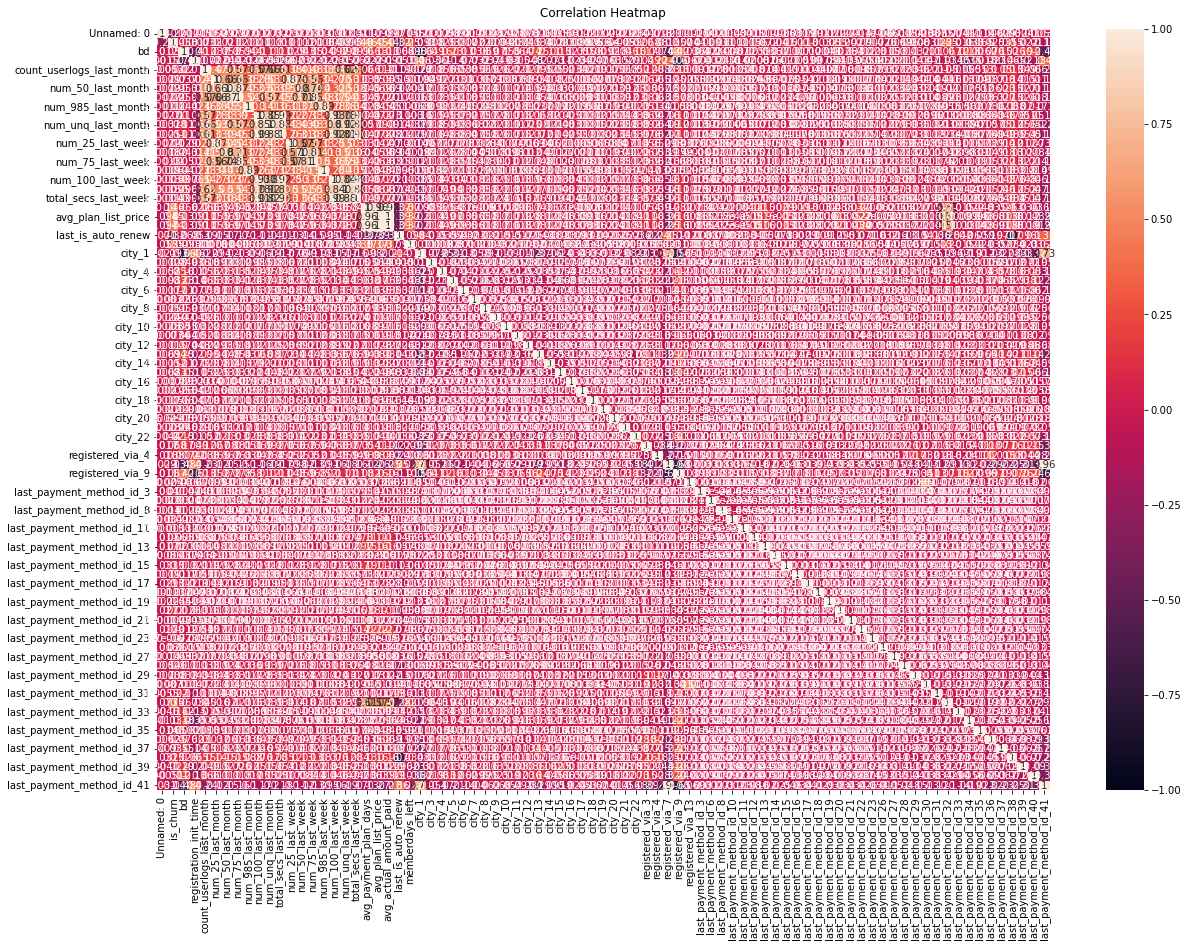

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 14))
heatmap = sns.heatmap(kkbox_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## 0.4 Outlier Detection

## 0.5 Missing Value Detection

In [21]:
# [kkbox_df[i].isna().value_counts() for i in kkbox_df.columns]

# 1 Data Preprocessing

## 1.1 Missing Values

In [23]:
# kkbox_df.filter(regex="num")

# 2 Modelling

In [9]:
kkbox_df = kkbox_df.drop(["Unnamed: 0"], axis=1)

In [8]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:

X = kkbox_df.drop("is_churn", axis=1)
y = kkbox_df["is_churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2.1 Logistic regression

In [7]:
LR = LogisticRegression(random_state=42, max_iter=5000)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

<AxesSubplot:>

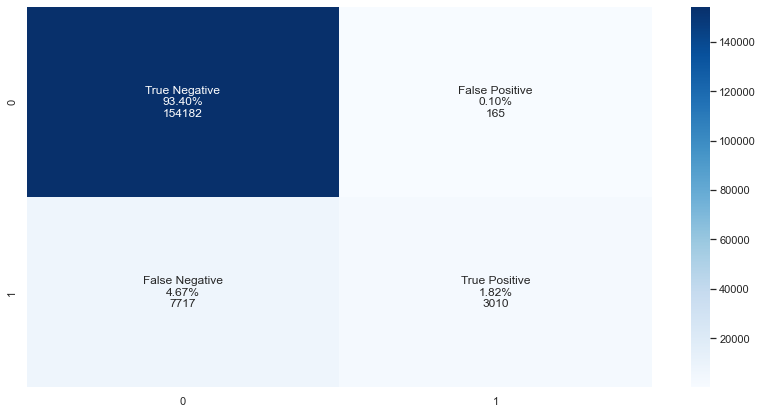

In [10]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
               
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
               
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
               
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
               
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(14,7)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [11]:
print(f'Accuracy of the model is {accuracy_score(y_test, y_pred)}')
print(f'Recall of the model is {recall_score(y_test, y_pred, average="macro")}')
print(f'Precision of the model is {precision_score(y_test, y_pred, average="macro", zero_division=1)}')

Accuracy of the model is 0.9522517174115851
Recall of the model is 0.6397656672201364
Precision of the model is 0.950182988100922


#### 2.1.1 Logistic Regression with regularization

In [12]:
alphas = [0.001, 0.01, 0.1, 1]
for alpha in alphas:
    LR = LogisticRegression(random_state=42, C=alpha, max_iter=5000)
    model = LR.fit(X_train, y_train)
    y_pred_ = LR.predict(X_test)
    print(f'For Alpha = {alpha}')
    print(f'Accuracy of the model is is {accuracy_score(y_test, y_pred_)}')
    print(f'Recall of the model is is {recall_score(y_test, y_pred_, average="macro")}')
    print(f'Precision of the model is is {precision_score(y_test, y_pred_, average="macro", zero_division=1)}\n')

For Alpha = 0.001
Accuracy of the model is is 0.9527545222142797
Recall of the model is is 0.6434175501429498
Precision of the model is is 0.9517669467887391

For Alpha = 0.01
Accuracy of the model is is 0.9522517174115851
Recall of the model is is 0.6397656672201364
Precision of the model is is 0.950182988100922

For Alpha = 0.1
Accuracy of the model is is 0.9522517174115851
Recall of the model is is 0.6397656672201364
Precision of the model is is 0.950182988100922

For Alpha = 1
Accuracy of the model is is 0.9522517174115851
Recall of the model is is 0.6397656672201364
Precision of the model is is 0.950182988100922



#### 2.2 Lasso regression

In [19]:
from sklearn.linear_model import Lasso
LA=Lasso(alpha=0.1, random_state=42)
LA.fit(X_train,y_train)
y_pred = LR.predict(X_test)

<AxesSubplot:>

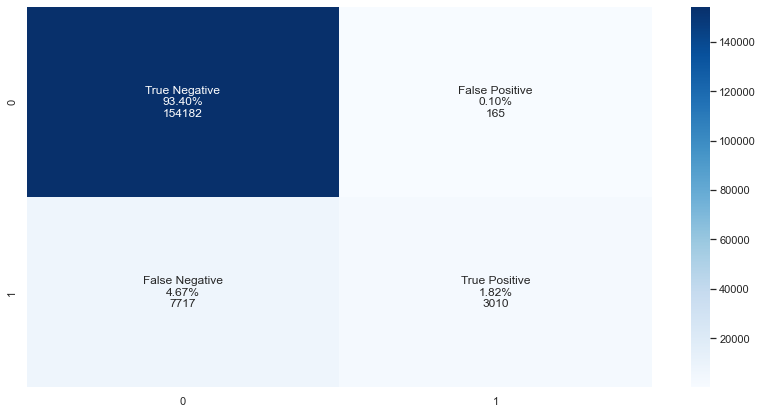

In [20]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
               
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
               
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
               
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
               
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(14,7)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [21]:
print(f'Accuracy of the model is {accuracy_score(y_test, y_pred)}')
print(f'Recall of the model is {recall_score(y_test, y_pred, average="macro")}')
print(f'Precision of the model is {precision_score(y_test, y_pred, average="macro", zero_division=1)}')

Accuracy of the model is 0.9522517174115851
Recall of the model is 0.6397656672201364
Precision of the model is 0.950182988100922


# Oversampling

In [2]:
import imblearn

In [13]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
print(Counter(y_over))

Counter({0: 771591, 1: 53777})
Counter({1: 771591, 0: 771591})


In [14]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [15]:
LR = LogisticRegression(random_state=42, max_iter=5000)
LR.fit(X_train_over, y_train_over)
y_pred_over = LR.predict(X_test_over)

<AxesSubplot:>

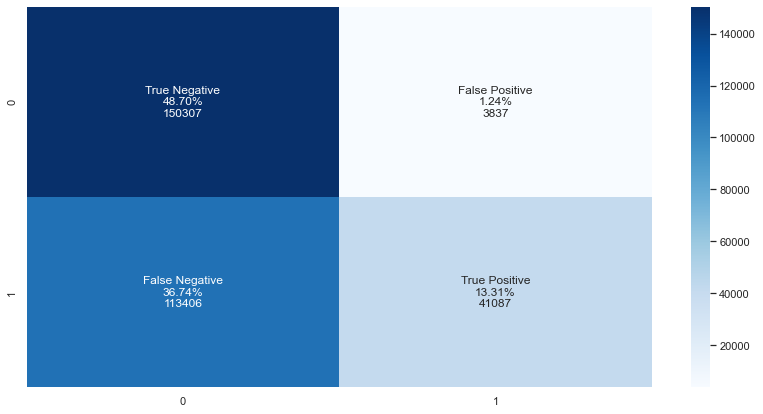

In [16]:
cf_matrix = confusion_matrix(y_test_over, y_pred_over)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
               
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
               
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
               
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
               
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(14,7)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [17]:
print(f'Accuracy of the model is {accuracy_score(y_test_over, y_pred_over)}')
print(f'Recall of the model is {recall_score(y_test_over, y_pred_over, average="macro")}')
print(f'Precision of the model is {precision_score(y_test_over, y_pred_over, average="macro", zero_division=1)}')

Accuracy of the model is 0.6201265564400898
Recall of the model is 0.620527507991743
Precision of the model is 0.742276700527551


#### Regularization Logistic

In [18]:
alphas = [0.001, 0.01, 0.1, 1]
for alpha in alphas:
    LR = LogisticRegression(random_state=42, C=alpha, max_iter=5000)
    model = LR.fit(X_train_over, y_train_over)
    y_pred_ = LR.predict(X_test_over)
    print(f'For Alpha = {alpha}')
    print(f'Accuracy of the model is is {accuracy_score(y_test_over, y_pred_)}')
    print(f'Recall of the model is is {recall_score(y_test_over, y_pred_, average="macro")}')
    print(f'Precision of the model is is {precision_score(y_test_over, y_pred_, average="macro", zero_division=1)}\n')

For Alpha = 0.001
Accuracy of the model is is 0.6201265564400898
Recall of the model is is 0.620527507991743
Precision of the model is is 0.742276700527551

For Alpha = 0.01
Accuracy of the model is is 0.6201265564400898
Recall of the model is is 0.620527507991743
Precision of the model is is 0.742276700527551

For Alpha = 0.1
Accuracy of the model is is 0.6201265564400898
Recall of the model is is 0.620527507991743
Precision of the model is is 0.742276700527551

For Alpha = 1
Accuracy of the model is is 0.6201265564400898
Recall of the model is is 0.620527507991743
Precision of the model is is 0.742276700527551



In [20]:
from sklearn.tree import DecisionTreeClassifier, export_text
DTC = DecisionTreeClassifier(max_depth =3, random_state = 42)
DTC.fit(X_train_over, y_train_over)
y_test_pred = DTC.predict(X_test_over)
tree_rules = export_text(DTC, feature_names = list(X_over.columns))
print(tree_rules)

|--- memberdays_left <= 197.50
|   |--- memberdays_left <= 98.50
|   |   |--- memberdays_left <= 26.50
|   |   |   |--- class: 1
|   |   |--- memberdays_left >  26.50
|   |   |   |--- class: 1
|   |--- memberdays_left >  98.50
|   |   |--- memberdays_left <= 100.50
|   |   |   |--- class: 0
|   |   |--- memberdays_left >  100.50
|   |   |   |--- class: 0
|--- memberdays_left >  197.50
|   |--- last_payment_method_id_39 <= 0.50
|   |   |--- memberdays_left <= 19199.50
|   |   |   |--- class: 1
|   |   |--- memberdays_left >  19199.50
|   |   |   |--- class: 1
|   |--- last_payment_method_id_39 >  0.50
|   |   |--- memberdays_left <= 204.00
|   |   |   |--- class: 0
|   |   |--- memberdays_left >  204.00
|   |   |   |--- class: 1



<AxesSubplot:>

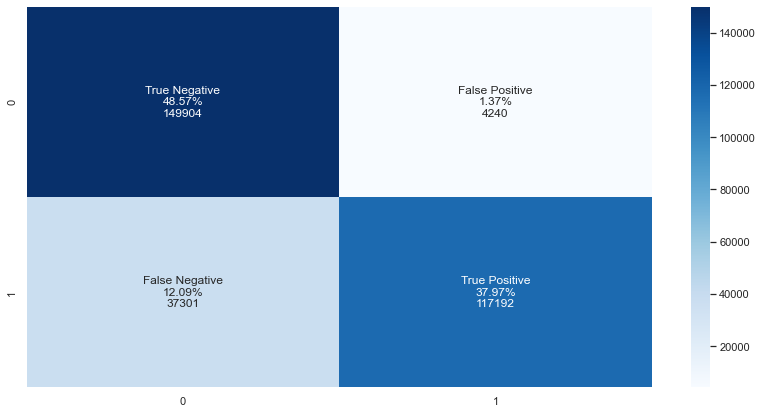

In [21]:
cf_matrix = confusion_matrix(y_test_over, y_test_pred)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
               
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
               
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
               
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
               
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(14,7)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [22]:
print(f'Accuracy of the model is {accuracy_score(y_test_over, y_test_pred)}')
print(f'Recall of the model is {recall_score(y_test_over, y_test_pred, average="macro")}')
print(f'Precision of the model is {precision_score(y_test_over, y_test_pred, average="macro", zero_division=1)}')

Accuracy of the model is 0.8654049903284441
Recall of the model is 0.8655259466296812
Precision of the model is 0.8829155910483957


***PRIMARY OBJECTIVE IS TO KEEP FALSE NEGATIVES LOW BECAUSE WHEN COSTUMOERS PREEDICTED TO STAY ACTUALLY CHRUN, WE LOOSE MONEY. SECONDLY, FALSE POSITIVES COSTUMERS THAT WE EXPECTED TO CHURN BUT ACTUALLY STAY MIGHT FROM THE BUSINESS PERSPECTIVE ALSO BE A LOSS BECAUSE IT MIGHT CAUSE COSTS BECAUSE EXPENSES HAVE BEEN PUT THERE AND MEASURES IN MARKETING TO KEEP THEM IN***

#### 2.2 Lasso

In [24]:
from sklearn.linear_model import Lasso
LA=Lasso(alpha=0.1, random_state=42, max_iter=5000)
LA.fit(X_train_over,y_train_over)
y_pred_over = LR.predict(X_test_over)

<AxesSubplot:>

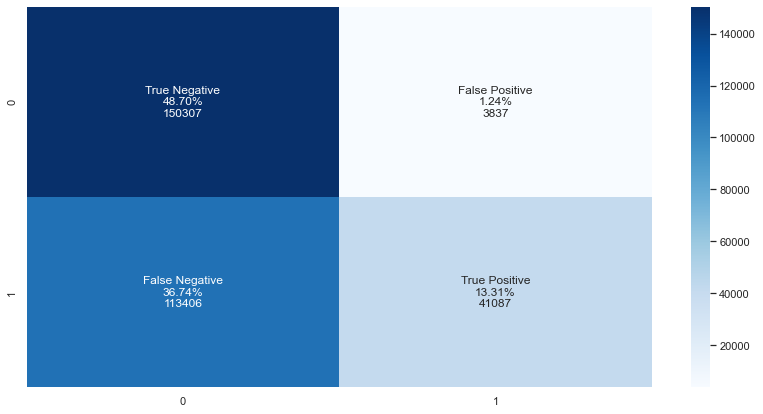

In [25]:
cf_matrix = confusion_matrix(y_test_over, y_pred_over)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
               
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
               
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
               
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
               
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(14,7)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [26]:
print(f'Accuracy of the model is {accuracy_score(y_test_over, y_test_pred)}')
print(f'Recall of the model is {recall_score(y_test_over, y_test_pred, average="macro")}')
print(f'Precision of the model is {precision_score(y_test_over, y_test_pred, average="macro", zero_division=1)}')

Accuracy of the model is 0.8654049903284441
Recall of the model is 0.8655259466296812
Precision of the model is 0.8829155910483957


#### 2.3 Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rndF = RandomForestClassifier(n_estimators=150, max_depth=3, random_state=42)
rndF.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=3, n_estimators=150, random_state=42)

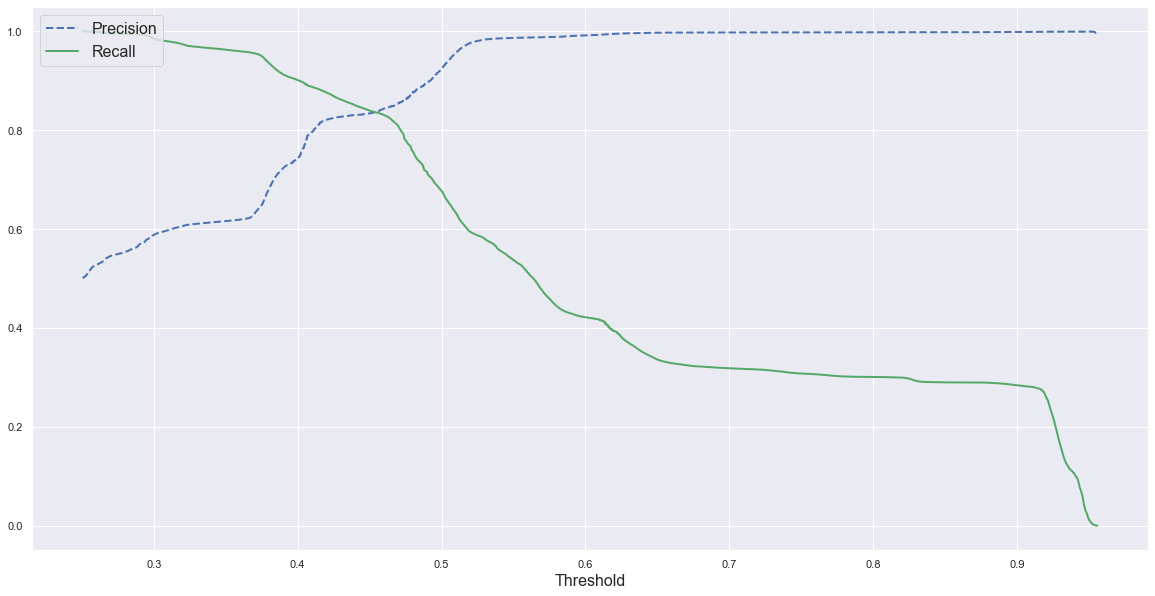

In [28]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
y_scores = pd.DataFrame(cross_val_predict(rndF, X_train_over, y_train_over, cv=5, method="predict_proba"))[1]
precisions, recalls, thresholds = precision_recall_curve(y_train_over, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)

plt.figure(figsize=(20, 10))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

<AxesSubplot:>

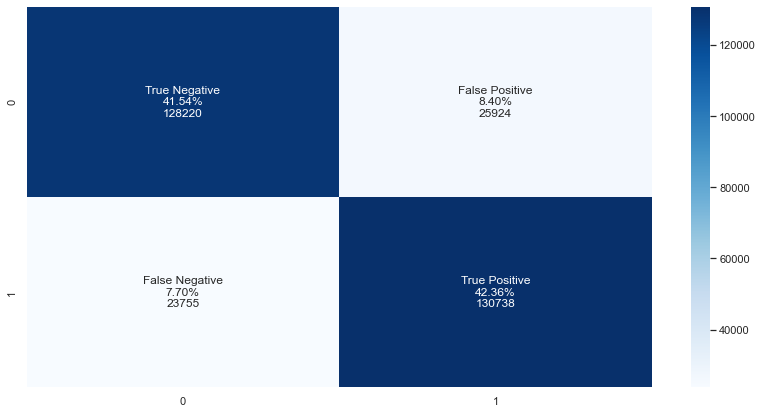

In [33]:
threshold = 0.45

predicted_proba = rndF.predict_proba(X_test_over)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

cf_matrix = confusion_matrix(y_test_over, predicted)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
               
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
               
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
               
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
               
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(14,7)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [34]:
print(f'Accuracy of the model is {accuracy_score(y_test_over, predicted)}')
print(f'Recall of the model is {recall_score(y_test_over, predicted, average="macro")}')
print(f'Precision of the model is {precision_score(y_test_over, predicted, average="macro", zero_division=1)}')

Accuracy of the model is 0.839037445283618
Recall of the model is 0.8390292927169634
Precision of the model is 0.8391070635377982
